In [92]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [93]:
crime = pd.read_csv('./data/서울시 5대범죄 발생현황.txt', sep='\t', header=1, thousands=',')
crime.head()

,기간,자치구,발생,검거,발생.1,검거.1,발생.2,검거.2,발생.3,검거.3,발생.4,검거.4,발생.5,검거.5
0,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
1,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,2019,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216


In [94]:
crime.drop([0],inplace =True)
del crime['기간']
crime.rename({
    '발생.1':'살인발생','검거.1':'살인검거',
    '발생.2':'강도발생','검거.2':'강도검거',
    '발생.3':'강간발생','검거.3':'강간검거',
    '발생.4':'절도발생','검거.4':'절도검거',
    '발생.5':'폭력발생','검거.5':'폭력검거'}, inplace =True,axis=1)
crime.head()

,자치구,발생,검거,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
5,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [95]:
crime.dtypes

자치구     object
발생       int64
검거       int64
살인발생     int64
살인검거     int64
강도발생     int64
강도검거     int64
강간발생     int64
강간검거     int64
절도발생     int64
절도검거     int64
폭력발생     int64
폭력검거     int64
dtype: object

In [96]:
crime.describe()

,발생,검거,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4146.720000,2992.200000,5.440000,5.120000,5.440000,5.320000,258.760000,240.280000,1688.160000,851.360000,2188.920000,1890.120000
std,1182.421651,805.356339,2.973214,2.905741,3.536477,3.325658,147.451484,221.590749,547.886901,239.641726,565.850239,480.402897
min,2110.000000,1497.000000,1.000000,1.000000,1.000000,1.000000,90.000000,83.000000,790.000000,394.000000,1224.000000,1014.000000
25%,3313.000000,2343.000000,3.000000,3.000000,3.000000,3.000000,175.000000,126.000000,1229.000000,634.000000,1816.000000,1585.000000
50%,4011.000000,2964.000000,5.000000,5.000000,5.000000,5.000000,195.000000,158.000000,1565.000000,908.000000,2117.000000,1857.000000
75%,4842.000000,3543.000000,6.000000,6.000000,7.000000,6.000000,273.000000,239.000000,2190.000000,1050.000000,2552.000000,2196.000000
max,7304.000000,5069.000000,13.000000,10.000000,15.000000,14.000000,666.000000,1143.000000,2970.000000,1339.000000,3658.000000,3159.000000


In [97]:
#검거율 구하기
crime['살인검거율'] = crime['살인검거'] / crime['살인발생'] *100
crime['강도검거율'] = crime['강도검거'] / crime['강도발생'] *100
crime['강간검거율'] = crime['강간검거'] / crime['강간발생'] *100
crime['절도검거율'] = crime['절도검거'] / crime['절도발생'] *100
crime['폭력검거율'] = crime['폭력검거'] / crime['폭력발생'] *100
crime.head()

,자치구,발생,검거,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
1,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892,125.000000,114.285714,480.252101,70.561056,90.874159
2,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633,50.000000,83.333333,58.974359,47.683924,84.963580
3,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823,100.000000,133.333333,87.132353,54.454454,89.538310
4,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216,83.333333,111.111111,72.180451,52.680412,87.230990
5,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585,125.000000,83.333333,78.021978,53.760000,85.536967


In [98]:
del crime['살인검거']
del crime['강도검거']
del crime['강간검거']
del crime['절도검거']
del crime['폭력검거']
del crime['발생']
del crime['검거']
crime.head()

,자치구,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
1,종로구,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159
2,중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
3,용산구,3,3,272,999,2036,100.000000,133.333333,87.132353,54.454454,89.538310
4,성동구,6,9,133,970,1394,83.333333,111.111111,72.180451,52.680412,87.230990
5,광진구,4,6,273,1875,1853,125.000000,83.333333,78.021978,53.760000,85.536967


In [99]:
crime.set_index('자치구', inplace=True)
crime.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
종로구,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159
중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3,3,272,999,2036,100.000000,133.333333,87.132353,54.454454,89.538310
성동구,6,9,133,970,1394,83.333333,111.111111,72.180451,52.680412,87.230990
광진구,4,6,273,1875,1853,125.000000,83.333333,78.021978,53.760000,85.536967


In [100]:
#정규화하기
from sklearn import preprocessing
col = ['살인발생','강도발생','강간발생','절도발생','폭력발생']
x =crime[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_norm = pd.DataFrame(x_scaled,columns=col, index=crime.index)


col2 = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']
crime_norm[col2]=crime[col2]
crime_norm.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,111.111111,72.180451,52.680412,87.230990
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967


In [101]:
col=['살인발생','강도발생','강간발생','절도발생','폭력발생']
crime_norm['범죄'] = np.sum(crime_norm[col], axis=1)
crime_norm.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄
자치구,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159,1.620591
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,1.557245
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310,1.054975
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,111.111111,72.180451,52.680412,87.230990,1.215161
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967,1.680980


In [102]:
col = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']
l = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']
crime_norm['검거'] = np.sum(crime_norm[col], axis=1)
crime_norm.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거
자치구,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159,1.620591,880.973031
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,1.557245,324.955196
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310,1.054975,464.458451
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,111.111111,72.180451,52.680412,87.230990,1.215161,406.536298
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967,1.680980,425.652278


In [103]:
crime_norm[['인구수','외국인수','cctv']] = result_cctv[['인구수','외국인','소계']]
crime_norm.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거,인구수,외국인수,cctv
자치구,,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159,1.620591,880.973031,159842,9890,1471
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,1.557245,324.955196,135321,9521,1544
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310,1.054975,464.458451,244953,15167,2063
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,111.111111,72.180451,52.680412,87.230990,1.215161,406.536298,302695,7104,2679
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967,1.680980,425.652278,361923,13859,1581


In [104]:
#100이 넘으면 100으로 처리
col_list = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']
for col in col_list:
    crime.loc[crime[col] > 100, col] = 100

crime.head()

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
종로구,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159
중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3,3,272,999,2036,100.000000,100.000000,87.132353,54.454454,89.538310
성동구,6,9,133,970,1394,83.333333,100.000000,72.180451,52.680412,87.230990
광진구,4,6,273,1875,1853,100.000000,83.333333,78.021978,53.760000,85.536967


In [105]:
result_cctv = pd.read_csv('./data/result_cctv.csv', encoding='utf8',index_col='구별' )
result_cctv.head()

,소계,최근증가율,인구수,내국인,외국인,세대당인구,65세이상고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,2.30,73942,0.891405,13.590156,0.959593,2579.013268
강동구,1879,82.960078,462275,458058,4217,2.35,68798,0.912228,14.882483,0.406468,526.315431
강북구,1265,83.068017,313550,309996,3554,2.13,62951,1.133472,20.076862,0.403444,710.063146
강서구,1617,77.887789,589536,583544,5992,2.19,88052,1.016393,14.935814,0.274284,1156.473682
관악구,3985,99.150425,514555,498574,15981,1.81,78206,3.105790,15.198764,0.774456,1428.441743


In [106]:
#시각화 하기

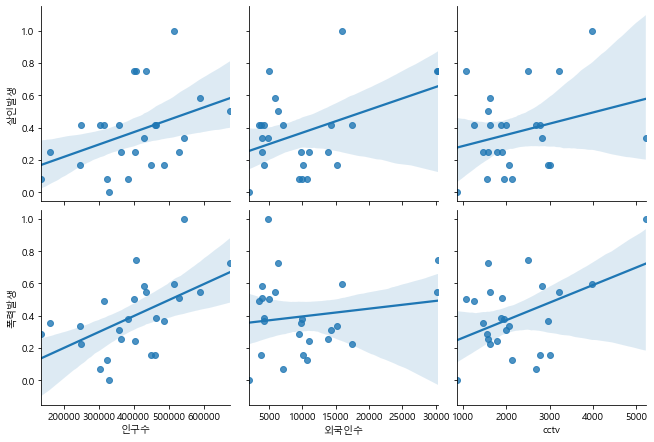

In [107]:
sns.pairplot(crime_norm, x_vars=['인구수','외국인수','cctv'],y_vars=['살인발생','폭력발생'],kind='reg',size=3)
plt.show()

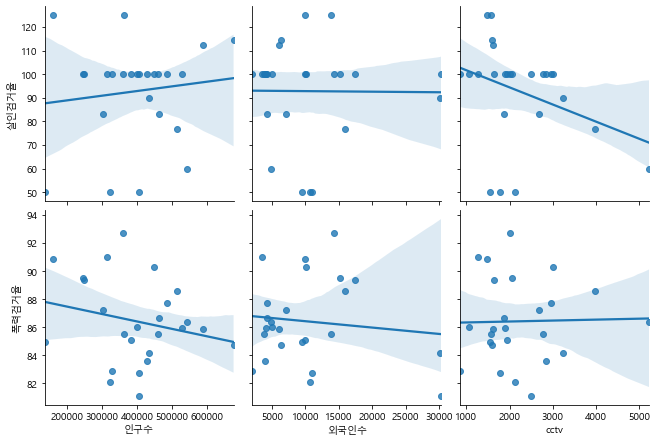

In [108]:
sns.pairplot(
    crime_norm,
    x_vars=['인구수','외국인수','cctv'],
    y_vars=['살인검거율','폭력검거율'],kind='reg',size=3)
plt.show()

In [109]:
# 히트맵 그리기 :검거항목 최대값을 100으로 한정하고 그 값을 정렬
tmp_max = crime_norm['검거'].max()
crime_norm['검거'] = crime_norm['검거'] / tmp_max * 100
crime_norm_sort = crime_norm.sort_values('검거', ascending=False)
crime_norm_sort

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거,인구수,외국인수,cctv
자치구,,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159,1.620591,100.000000,159842,9890,1471
강서구,0.583333,0.142857,0.375000,0.577982,0.547658,112.500000,133.333333,83.986928,52.536585,85.881893,2.226830,53.150179,589536,5992,1617
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310,1.054975,52.721075,244953,15167,2063
중랑구,0.750000,0.214286,0.083333,0.401835,0.503698,100.000000,125.000000,78.260870,54.501801,86.000000,1.953152,50.371879,400989,4992,1068
은평구,0.166667,0.000000,0.180556,0.355505,0.366886,100.000000,100.000000,83.505155,62.428115,87.718470,1.069613,49.224179,485842,4296,2962
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100.000000,100.000000,73.863636,67.560074,90.266584,0.752594,49.001533,449871,10152,3003
구로구,0.750000,0.142857,0.236111,0.516514,0.545604,90.000000,133.333333,73.008850,50.365344,84.169279,2.191086,48.909194,435751,30172,3227
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967,1.680980,48.316153,361923,13859,1581
송파구,0.500000,0.642857,0.317708,0.745872,0.726376,114.285714,100.000000,84.249084,42.052980,84.725936,2.932813,48.277722,676673,6342,1586


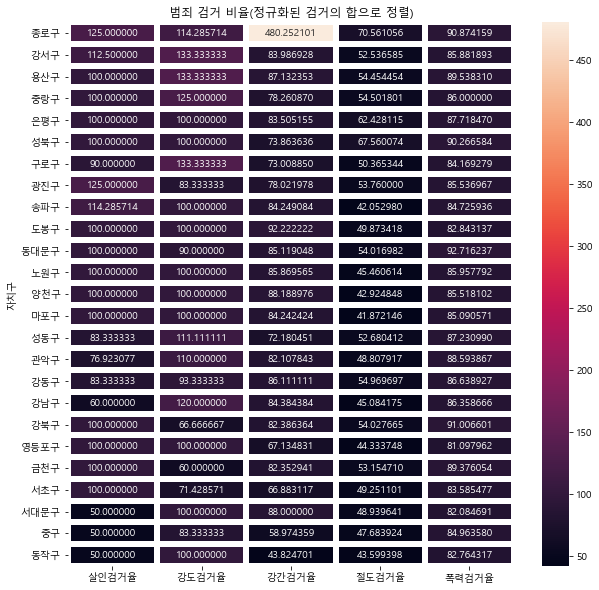

In [111]:
target_col = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']

plt.figure(figsize=(10,10))
sns.heatmap(crime_norm_sort[target_col], annot=True, fmt='f', linewidths=5)
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')
plt.show()

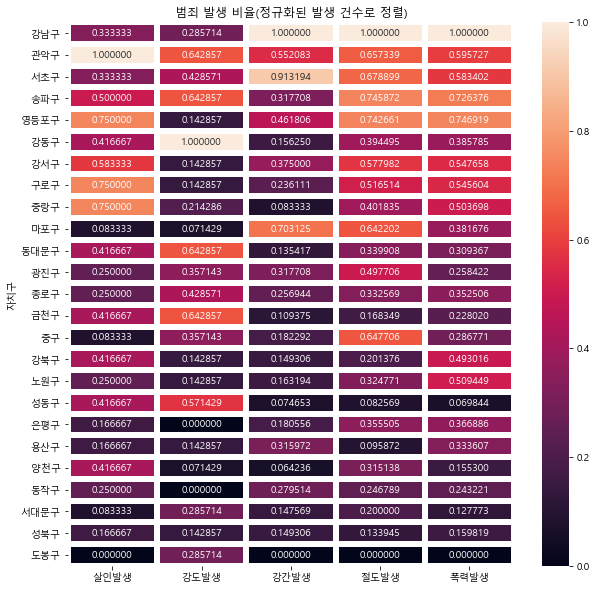

In [112]:
target_col = ['살인발생','강도발생','강간발생','절도발생','폭력발생']
crime_norm['범죄'] = crime_norm['범죄'] / 5
crime_norm_sort = crime_norm.sort_values('범죄', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_norm_sort[target_col], annot=True, fmt='f', linewidths=5)
plt.title('범죄 발생 비율(정규화된 발생 건수로 정렬)')
plt.show()

In [113]:
crime_norm.to_csv('./data/result_crime.csv')

지도표현

In [116]:
import folium
import json
geo_str = json.load(open('./data/skorea_municipalities_geo_simple.json',
                         encoding='utf8'))

In [117]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_norm['살인발생'],
               columns = [crime_norm.index, crime_norm['살인발생']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

In [118]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_norm['강간발생'],
               columns = [crime_norm.index, crime_norm['강간발생']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

In [119]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_norm['범죄'],
               columns = [crime_norm.index, crime_norm['범죄']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id')
map

경찰서 표시

In [122]:
import requests
from urllib.parse import quote

key_fd = open('../06_roadapi/roadapikey.txt', mode='r')
roadapi_key = key_fd.read(100)
key_fd.close()
key_fd = open('../06_roadapi/kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [124]:
police_list = [
    '서울강남경찰서', '서울강동경찰서', '서울강북경찰서', '서울강서경찰서',
    '서울관악경찰서', '서울광진경찰서', '서울구로경찰서', '서울금천경찰서',
    '서울남대문경찰서', '서울노원경찰서', '서울도봉경찰서', '서울동대문경찰서',
    '서울동작경찰서', '서울마포경찰서', '서울방배경찰서', '서울서대문경찰서',
    '서울서부경찰서', '서울서초경찰서', '서울성동경찰서', '서울성북경찰서',
    '서울송파경찰서', '서울수서경찰서', '서울양천경찰서', '서울영등포경찰서',
    '서울용산경찰서', '서울은평경찰서', '서울종로경찰서', '서울종암경찰서',
    '서울중랑경찰서', '서울중부경찰서', '서울혜화경찰서'
]

In [125]:
road_url = 'https://www.juso.go.kr/addrlink/addrLinkApi.do'

road_addr_list = []
for police in police_list:
    url = f'{road_url}?confmKey={roadapi_key}&currentPage=1&countPerPage=10&keyword={quote(police)}&resultType=json'
    results = requests.get(url).json()
    addr_list = results['results']['juso']
    road_addr = addr_list[0]['roadAddr']
    road_addr_list.append(road_addr)
    #print(road_addr)

In [126]:
# 경찰서 이전 정보가 제대로 반영이 안되어있음
road_addr_list[0] = '서울특별시 강남구 테헤란로114길 11 (대치동)'

In [127]:
pdf = pd.DataFrame({'name': police_list, 'addr': road_addr_list})
pdf.head()

,name,addr
0,서울강남경찰서,서울특별시 강남구 테헤란로114길 11 (대치동)
1,서울강동경찰서,서울특별시 강동구 고덕로80길 7 (상일동)
2,서울강북경찰서,서울특별시 강북구 오패산로 406 (번동)
3,서울강서경찰서,서울특별시 강서구 화곡로 308 (화곡동)
4,서울관악경찰서,서울특별시 관악구 관악로5길 33 (봉천동)


In [129]:
lat_list, lng_list = [], []
for i in pdf.index:
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + quote(pdf.addr[i])
    result = requests.get(url,
            headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat = float(result['documents'][0]['y'])
    lng = float(result['documents'][0]['x'])
    lat_list.append(lat)
    lng_list.append(lng)

In [131]:
pdf['lat'], pdf['lng'] = lat_list, lng_list
pdf.head()

,name,addr,lat,lng
0,서울강남경찰서,서울특별시 강남구 테헤란로114길 11 (대치동),37.509367,127.067100
1,서울강동경찰서,서울특별시 강동구 고덕로80길 7 (상일동),37.556215,127.165844
2,서울강북경찰서,서울특별시 강북구 오패산로 406 (번동),37.637170,127.027042
3,서울강서경찰서,서울특별시 강서구 화곡로 308 (화곡동),37.551558,126.849656
4,서울관악경찰서,서울특별시 관악구 관악로5길 33 (봉천동),37.474234,126.951870


In [132]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_norm['검거'],
               columns = [crime_norm.index, crime_norm['검거']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
for i in pdf.index:
    folium.CircleMarker([pdf.lat[i], pdf.lng[i]], radius=10,
                        tooltip=pdf.name[i],
                        color='#3186cc', fill_color='#3186cc').add_to(map)
map

In [133]:

pdf.to_csv('./result_police.csv')